# Dynamically update graph

In [1]:
cd ~/thesis

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Import libraries

In [4]:
import numpy as np
import pandas as pd
import networkx as nx

# Modify eliorc's implementation
from eliorc_mod.node2vec import Node2Vec
from gensim.models import Word2Vec

from utils import *

### BlogCatalog 

In [139]:
blog_dir = '/home/jovyan/thesis/datasets/blog_catalog/data/'

G = nx.read_edgelist(blog_dir+'edges.csv', delimiter=',')
G.name = 'blog_catalog'

# Groups mapping
group_df = pd.read_csv(blog_dir+'group-edges.csv', delimiter=',')
group_df.columns = ['node_num', 'group']

model = Word2Vec.load("models/blog_model")

groups_dict = {node_num: group_df.loc[node_num, 'group']  for node_num in group_df['node_num']}

X, y, _ = emb_group_gen(groups_dict, model)

# # Plot
# test_grid_search(G, X, y)

In [140]:
G.nodes()

NodeView(('1', '176', '233', '283', '371', '394', '446', '585', '645', '667', '696', '753', '792', '867', '911', '996', '1136', '1175', '1263', '1443', '1644', '1787', '1811', '1876', '1971', '2369', '2461', '2521', '2624', '2771', '2861', '2999', '3122', '3198', '3204', '3258', '3262', '3339', '3407', '3489', '3561', '3599', '3608', '3820', '3940', '4062', '4374', '4390', '4491', '4613', '4652', '4723', '4836', '4839', '4843', '4928', '4984', '4997', '5092', '5152', '5204', '5241', '5259', '5311', '5334', '5346', '5377', '5450', '5488', '5685', '5705', '5851', '5906', '5912', '5999', '6030', '6066', '6074', '6141', '6179', '6187', '6539', '6551', '6552', '6639', '6643', '6753', '6832', '6860', '6895', '6907', '6950', '6959', '7019', '7098', '7149', '7228', '7370', '7373', '7495', '7545', '7748', '7806', '7922', '7966', '7989', '8056', '8099', '8234', '8387', '8524', '8525', '8859', '8969', '8976', '9824', '9919', '9961', '9997', '10143', '2', '2241', '2803', '4845', '6873', '8868', '8

In [144]:
subgraph, removed_nodes_edges_dict = remove_nodes_connected(G, num_nodes=10)

In [145]:
removed_nodes_edges_dict

{'4310': [('4310', '176'),
  ('4310', '233'),
  ('4310', '792'),
  ('4310', '2521'),
  ('4310', '3198'),
  ('4310', '3561'),
  ('4310', '4374'),
  ('4310', '4839'),
  ('4310', '4928'),
  ('4310', '4984'),
  ('4310', '4997'),
  ('4310', '5092'),
  ('4310', '5259'),
  ('4310', '5685'),
  ('4310', '7098'),
  ('4310', '7495'),
  ('4310', '8387'),
  ('4310', '8859'),
  ('4310', '3560'),
  ('4310', '4122'),
  ('4310', '4404'),
  ('4310', '9311'),
  ('4310', '1226'),
  ('4310', '4490'),
  ('4310', '4561'),
  ('4310', '5068'),
  ('4310', '9188'),
  ('4310', '1593'),
  ('4310', '3056'),
  ('4310', '4256'),
  ('4310', '4708'),
  ('4310', '4995'),
  ('4310', '5700'),
  ('4310', '9358'),
  ('4310', '5747'),
  ('4310', '9216'),
  ('4310', '3386'),
  ('4310', '4488'),
  ('4310', '1110'),
  ('4310', '1055'),
  ('4310', '3224'),
  ('4310', '5256'),
  ('4310', '2044'),
  ('4310', '10058'),
  ('4310', '2062'),
  ('4310', '4360'),
  ('4310', '6243'),
  ('4310', '1857'),
  ('4310', '3096'),
  ('4310', '55

In [43]:
subgraph, removed_nodes_edges_dict = remove_nodes_connected(G, num_nodes=15)

In [47]:
subgraph.number_of_nodes(), subgraph.number_of_edges()

(10262, 331457)

In [138]:
removed_nodes_edges_dict

{6: (6, 20), 19: (19, 17), 23: (23, 29), 7: (7, 0), 25: (25, 2)}

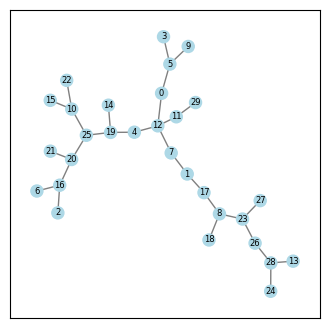

In [167]:
initial_graph = nx.random_tree(30)
plot_graph(initial_graph)

In [168]:
subgraph, removed_nodes_edges_dict = remove_nodes_connected(initial_graph, num_nodes=5)

26 25


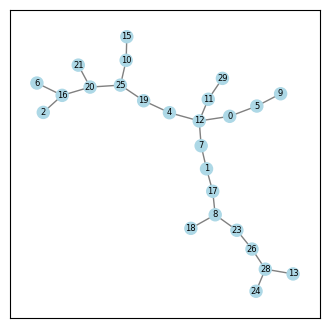

27 26


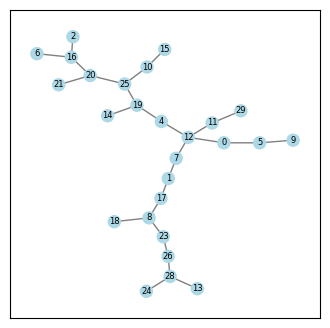

28 27


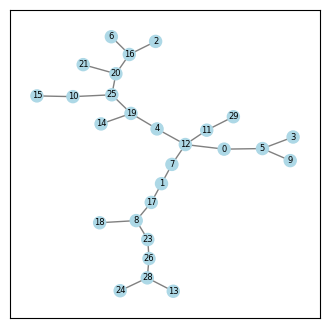

29 28


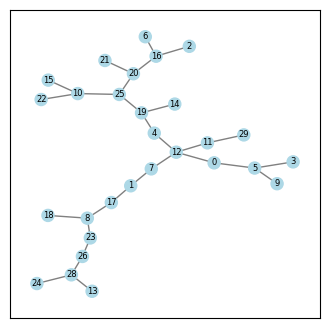

30 29


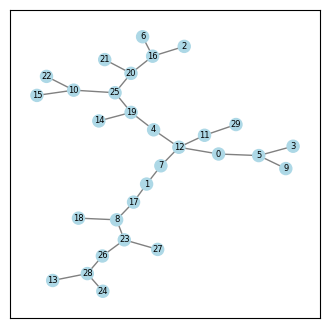

In [171]:
graphs_list = dynamic_graph_gen(initial_graph, 5)

for graph in graphs_list:
    print(graph.number_of_nodes(), graph.number_of_edges())
    plot_graph(graph)

In [177]:
graphs_list = dynamic_graph_gen(G, 50)

(10263, 331727)
(10264, 331736)
(10265, 331737)
(10266, 332264)
(10267, 332268)
(10268, 332282)
(10269, 332289)
(10270, 332302)
(10271, 332306)
(10272, 332318)
(10273, 332349)
(10274, 332351)
(10275, 332436)
(10276, 332538)
(10277, 332580)
(10278, 332584)
(10279, 332588)
(10280, 332594)
(10281, 332605)
(10282, 332697)
(10283, 332714)
(10284, 332745)
(10285, 332783)
(10286, 332791)
(10287, 332800)
(10288, 332824)
(10289, 332845)
(10290, 332847)
(10291, 332964)
(10292, 332987)
(10293, 332995)
(10294, 333006)
(10295, 333029)
(10296, 333068)
(10297, 333093)
(10298, 333096)
(10299, 333129)
(10300, 333153)
(10301, 333295)
(10302, 333345)
(10303, 333397)
(10304, 333465)
(10305, 333470)
(10306, 333519)
(10307, 333526)
(10308, 333528)
(10309, 333750)
(10310, 333756)
(10311, 333803)
(10312, 333983)


In [ ]:
for graph in graphs_list:
    print(quick_info(graph))